# Arrhytmia Dataset using CNN and Random Forests

***Imports***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heartbeat/ptbdb_abnormal.csv
/kaggle/input/heartbeat/ptbdb_normal.csv
/kaggle/input/heartbeat/mitbih_test.csv
/kaggle/input/heartbeat/mitbih_train.csv


## ***Dataset***

***Load the dataset***

In [2]:
train_df = pd.read_csv('/kaggle/input/heartbeat/mitbih_train.csv', header=None)
test_df = pd.read_csv('/kaggle/input/heartbeat/mitbih_test.csv', header=None)

inputs = len(train_df.columns) - 1
label_dict = {0:'N', 1:'S', 2:'V', 3:'F', 4:'Q'}
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [3]:
train_df[[187]] = train_df[[187]].astype(int)
test_df[[187]] = test_df[[187]].astype(int)

***Examine and resample the data***

187
0      72471
1       2223
2       5788
3        641
4       6431
dtype: int64


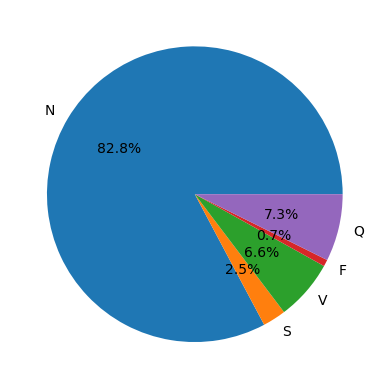

In [4]:
plt.pie(train_df[[187]].value_counts().sort_index(), labels=label_dict.values(), autopct='%1.1f%%')
plt.plot()
print(train_df[[187]].value_counts().sort_index())

In [5]:
train_df_grouped = [
    sklearn.utils.resample(
        train_df[train_df[187]==i],
        replace=True,
        n_samples=20000,
        random_state=0
    ) for i in label_dict
]

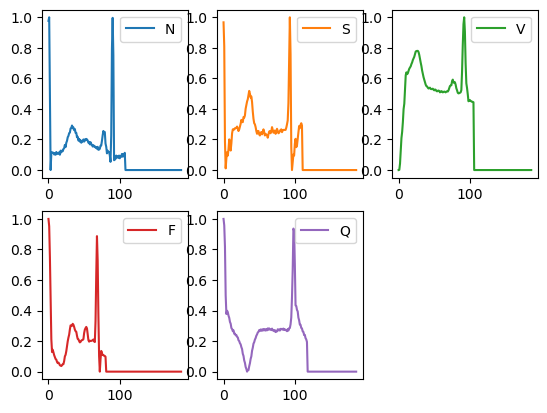

In [6]:
for i,train_part in enumerate(train_df_grouped):
    plt.subplot(2,3,i+1)
    r=0
    for _ in range(i):
        # only for color
        plt.plot([0])
    plt.plot(train_part.iloc[r][:187], label=label_dict[train_part.iloc[r][187]])
    plt.legend()
plt.show()

187
0      20000
1      20000
2      20000
3      20000
4      20000
dtype: int64


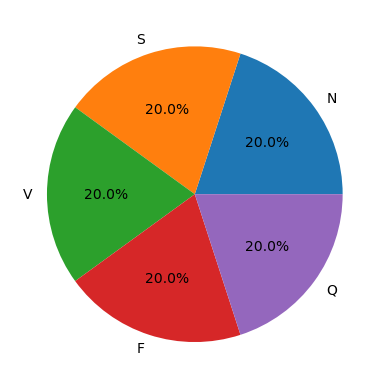

In [7]:
train_df = pd.concat(train_df_grouped)
plt.pie(train_df[[187]].value_counts().sort_index(), labels=label_dict.values(), autopct='%1.1f%%')
plt.plot()
print(train_df[[187]].value_counts().sort_index())

In [8]:
train_df = train_df.sample(frac=1, random_state=0).reset_index(drop=True)

In [9]:
train_x = train_df[list(range(187))]
train_y = train_df[[187]]
test_x = test_df[list(range(187))]
test_y = test_df[[187]]

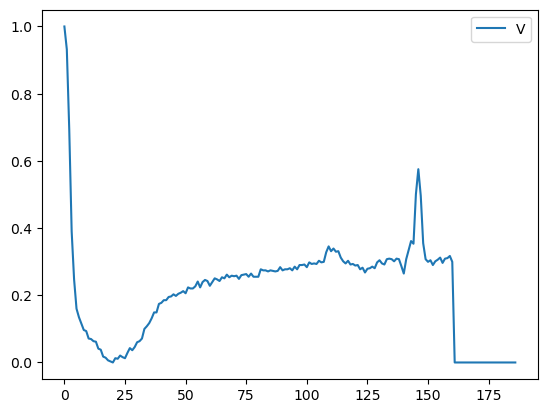

In [10]:
r=800
plt.plot(train_x.iloc[r], label=label_dict[train_y.iloc[r].values[0]])
plt.legend()
plt.show()

In [11]:
train_y = tf.one_hot(train_y.values.reshape((-1)), 5)
test_y = tf.one_hot(test_y.values.reshape((-1)), 5)

In [12]:
train_x = train_x.values.reshape((-1,187,1))
test_x = test_x.values.reshape((-1,187,1))
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(100000, 187, 1)
(100000, 5)
(21892, 187, 1)
(21892, 5)


## ***Model***

***CNN Model***
Based on the architecture from "ECG Heartbeat Classification: A Deep Transferable
Representation" paper (https://arxiv.org/abs/1805.00794)

> Here, all convolution layers
are applying 1-D convolution through time and each have 32
kernels of size 5.

In [13]:
def make_conv1d(prev_layer):
    return tf.keras.layers.Conv1D(filters=32, kernel_size=5, padding='same')(prev_layer)

> We also use max pooling of size 5 and stride
2 in all pooling layers.

In [14]:
def make_maxpool1d(prev_layer):
    return tf.keras.layers.MaxPool1D(pool_size=5, strides=2)(prev_layer)

> The predictor network consists of five residual blocks followed by two fully-connected layers with 32 neurons each and a softmax layer to predict output class probabilities. Each residual block contains two convolutional layers, two ReLU nonlinearities, a residual skip connection, and a pooling layer. In total, the resulting network is a deep network consisting of 13 weight layers.

In [15]:
def make_activation(prev_layer):
    return tf.keras.layers.Activation('relu')(prev_layer)

In [16]:
def make_block(prev_layer):
    block = make_conv1d(prev_layer)
    block = make_activation(block)
    block = make_conv1d(block)
    block = tf.keras.layers.Add()([block, prev_layer])
    block = make_activation(block)
    return make_maxpool1d(block)

In [17]:
def make_model():
    input_layer = tf.keras.layers.Input(shape=(187,1))
    model_arch = make_conv1d(input_layer)
    
    for i in range(5):
        model_arch = make_block(model_arch)
    
    model_arch = tf.keras.layers.Flatten()(model_arch)
    model_arch = tf.keras.layers.Dense(32)(model_arch)
    model_arch = make_activation(model_arch)
    model_arch = tf.keras.layers.Dense(32)(model_arch)
    model_arch = tf.keras.layers.Dense(5)(model_arch)
    model_arch = tf.keras.layers.Softmax()(model_arch)
    
    return tf.keras.Model(inputs=input_layer, outputs=model_arch)

In [18]:
model = make_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 187, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 187, 32)      192         ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 187, 32)      5152        ['conv1d[0][0]']                 
                                                                                                  
 activation (Activation)        (None, 187, 32)      0           ['conv1d_1[0][0]']               
                                                                                              

> ... we used Adam optimization method with the learning rate, beta-1, and beta-2 of 0.001, 0.9, and 0.999, respectively. Learning rate is decayed exponentially with the decay factor of 0.75 every 10000 iterations

In [19]:
decay = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.75
)
optimizer = tf.keras.optimizers.Adam(learning_rate=decay) # default values are equal to the ones from the paper

> Cross entropy loss on the softmax outputs is used as the loss function.

In [20]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=[
    tf.keras.metrics.Accuracy()
    #tf.keras.metrics.Precision(),
    #tf.keras.metrics.Recall()
    #tf.keras.metrics.FalseNegatives(),
    #tf.keras.metrics.FalsePositives()
])

***Training***

In [21]:
history = model.fit(x=train_x, y=train_y, batch_size=256, epochs=100, verbose=1, validation_data=(test_x, test_y))

Epoch 1/100
251/391 [==================>...........] - ETA: 22s - loss: 0.5588 - accuracy: 0.0000e+00

KeyboardInterrupt: 